#### IMPORT

In [1]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# time
import datetime

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#### 변수 목록

##### 2016 ~ 2019 모두 있는 변수만

1. 신체상에 대한 인식 변수     
- "[PR_HT]1. 평상시 자신의 건강상태가 어떻다고 생각합니까?
[1] ① 매우 건강한 편이다
[2] ② 건강한 편이다
[3] ③ 보통이다
[4] ④ 건강하지 못한 편이다
[5] ⑤ 매우 건강하지 못한 편이다"        

- "[PR_BI]2. 자신의 체형이 어떻다고 생각합니까?
[1] ① 매우 마른 편이다
[2] ② 약간 마른 편이다
[3] ③ 보통이다
[4] ④ 약간 살이 찐 편이다
[5] ⑤ 매우 살이 찐 편이다"      

- "[WC_MN]17. 최근 30일 동안, 체중을 조절하기 위해 노력한 적이 있습니까?
[1] ① 최근 30일 동안 체중을 조절하기 위해 별다른 노력을 하지 않았다 
[2] ② 최근 30일 동안 체중을 줄이기 위해 노력했다 
[3] ③ 최근 30일 동안 체중을 늘리기 위해 노력했다 
[4] ④ 최근 30일 동안 현재 체중을 유지하기 위해 노력했다"


</br>                         
                                             

2. 우울에 관한 변수        
- "[M_STR]31. 평상시 스트레스를 얼마나 느끼고 있습니까?
[1] ① 대단히 많이 느낀다 
[2] ② 많이 느낀다   
[3] ③ 조금 느낀다   
[4] ④ 별로 느끼지 않는다 
[5] ⑤ 전혀 느끼지 않는다 "             

- "[M_SAD]35. 최근 12개월 동안, 2주 내내 일상생활을 중단할 정도로 슬프거나 절망감을 느낀 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"

- "[M_SUI_CON]36. 최근 12개월 동안, 심각하게 자살을 생각한 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"


- "[M_SUI_PLN]37. 최근 12개월 동안, 자살하기 위해 구체적인 계획을 세운 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"


- "[M_SUI_ATT]25. 최근 12개월 동안, 자살을 시도한 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"  

- "[V_TRT]53. 최근 12개월 동안, 친구, 선배, 성인에게 폭력(신체적 폭행, 협박, 따돌림 등 신체․정신 또는 재산상의 피해)을 당해 병원에서 치료를 받은 적이 있습니까?
[1] ① 0번
[2] ② 1번
[3] ③ 2번
[4] ④ 3번
[5] ⑤ 4번
[6] ⑥ 5번
[7] ⑦ 6번 이상 "








##### 2017 ~ 2020 모두 있는 변수만

1. 신체상에 대한 인식 변수    
- "[PR_HT]1. 평상시 자신의 건강상태가 어떻다고 생각합니까?
[1] ① 매우 건강한 편이다
[2] ② 건강한 편이다
[3] ③ 보통이다
[4] ④ 건강하지 못한 편이다
[5] ⑤ 매우 건강하지 못한 편이다"           

- "[PR_BI]2. 자신의 체형이 어떻다고 생각합니까?
[1] ① 매우 마른 편이다
[2] ② 약간 마른 편이다
[3] ③ 보통이다
[4] ④ 약간 살이 찐 편이다
[5] ⑤ 매우 살이 찐 편이다"             

- "[WC_MN]17. 최근 30일 동안, 체중을 조절하기 위해 노력한 적이 있습니까?
[1] ① 최근 30일 동안 체중을 조절하기 위해 별다른 노력을 하지 않았다 
[2] ② 최근 30일 동안 체중을 줄이기 위해 노력했다 
[3] ③ 최근 30일 동안 체중을 늘리기 위해 노력했다 
[4] ④ 최근 30일 동안 현재 체중을 유지하기 위해 노력했다"



</br>



2. 우울에 관한 변수   
- "[M_STR]31. 평상시 스트레스를 얼마나 느끼고 있습니까?
[1] ① 대단히 많이 느낀다 
[2] ② 많이 느낀다   
[3] ③ 조금 느낀다   
[4] ④ 별로 느끼지 않는다 
[5] ⑤ 전혀 느끼지 않는다 "             

- "[M_SAD]35. 최근 12개월 동안, 2주 내내 일상생활을 중단할 정도로 슬프거나 절망감을 느낀 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"

- "[M_SUI_CON]36. 최근 12개월 동안, 심각하게 자살을 생각한 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"


- "[M_SUI_PLN]37. 최근 12개월 동안, 자살하기 위해 구체적인 계획을 세운 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"


- "[M_SUI_ATT]25. 최근 12개월 동안, 자살을 시도한 적이 있었습니까?
[1] ① 최근 12개월 동안 없다
[2] ② 최근 12개월 동안 있다"


- "[V_TRT]53. 최근 12개월 동안, 친구, 선배, 성인에게 폭력(신체적 폭행, 협박, 따돌림 등 신체․정신 또는 재산상의 피해)을 당해 병원에서 치료를 받은 적이 있습니까?
[1] ① 0번
[2] ② 1번
[3] ③ 2번
[4] ④ 3번
[5] ⑤ 4번
[6] ⑥ 5번
[7] ⑦ 6번 이상 "







In [ ]:
# ['PR_HT', 'PR_BI', 'WC_MN'] # 신체인식
# ['M_STR', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN', 'M_SUI_ATT', 'V_TRT'] # 우울

In [ ]:
# 불러오는 데 25분 정도 걸림

data = pd.read_excel('D:\\SNUlab\\0. data\\질병관리청_청소년건강행태조사\\2014_2020 combined.xlsx')
data

In [2]:
data2 = pd.read_csv('D:\\SNUlab\\0. data\\질병관리청_청소년건강행태조사\\c_health_1420.csv', encoding = 'cp949', low_memory = False)
data2

,OBS,mod_d,YEAR,CITY,CTYPE,CTYPE_SD,MH,SCHOOL,STYPE,STRATA,...,E_FAS1_COM,E_FAS1_BATH,E_FAS1_AIR,AC_AD,AC_POP,COVID_PA,COVID_BR,COVID_AC,COVID_TC,COVID_M
0,A100001,2019.02.01.,2014,서울,대도시,대도시,중학교,중학교,남여공학,2014_74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A100002,2019.02.01.,2014,서울,대도시,대도시,중학교,중학교,남여공학,2014_74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A100003,2019.02.01.,2014,서울,대도시,대도시,중학교,중학교,남여공학,2014_74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A100004,2019.02.01.,2014,서울,대도시,대도시,중학교,중학교,남여공학,2014_74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A100005,2019.02.01.,2014,서울,대도시,대도시,중학교,중학교,남여공학,2014_74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495041,A154844,2022.05.04.,2021,세종,대도시,대도시,고등학교,NaN,남녀공학,2021_72,...,NaN,NaN,NaN,1.0,1.0,2.0,2.0,1.0,NaN,2.0
495042,A154845,2022.05.04.,2021,세종,대도시,대도시,고등학교,NaN,남녀공학,2021_72,...,NaN,NaN,NaN,2.0,1.0,4.0,3.0,3.0,3.0,3.0
495043,A154846,2022.05.04.,2021,세종,대도시,대도시,고등학교,NaN,남녀공학,2021_72,...,NaN,NaN,NaN,1.0,2.0,5.0,5.0,5.0,5.0,5.0
495044,A154847,2022.05.04.,2021,세종,대도시,대도시,고등학교,NaN,남녀공학,2021_72,...,NaN,NaN,NaN,1.0,1.0,1.0,3.0,3.0,3.0,3.0


In [4]:
df = data2.copy()

In [5]:
df['CITY'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '세종'], dtype=object)

In [6]:
df['CTYPE'].unique()

array(['대도시', '군지역', '중소도시'], dtype=object)

In [7]:
# 16-19, 17-20 각각 추출 후 df 생성

df1619 = df.loc[(df['YEAR'] >= 2016) & (df['YEAR'] <= 2019)].reset_index(drop = True)
df1720 = df.loc[(df['YEAR'] >= 2017) & (df['YEAR'] <= 2020)].reset_index(drop = True)

# 필요한 열만 추출

df1619 = df1619[['OBS', 'YEAR', 'CITY', 'PR_HT', 'PR_BI', 'WC_MN', 'M_STR', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN', 'M_SUI_ATT', 'V_TRT']]
df1720 = df1720[['OBS', 'YEAR', 'CITY', 'PR_HT', 'PR_BI', 'WC_MN', 'M_STR', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN', 'M_SUI_ATT', 'V_TRT']]

In [9]:
df1619.groupby('YEAR').count()

,OBS,CITY,PR_HT,PR_BI,WC_MN,M_STR,M_SAD,M_SUI_CON,M_SUI_PLN,M_SUI_ATT,V_TRT
YEAR,,,,,,,,,,,
2016,65528,65528,65528,65528,65528,65528,65528,65528,65528,65528,65528
2017,62276,62276,62276,62276,62276,62276,62276,62276,62276,62276,62276
2018,60040,60040,60040,60040,60040,60040,60040,60040,60040,60040,60040
2019,57303,57303,57303,57303,57303,57303,57303,57303,57303,57303,57303


In [10]:
df1619.describe()

,YEAR,PR_HT,PR_BI,WC_MN,M_STR,M_SAD,M_SUI_CON,M_SUI_PLN,M_SUI_ATT,V_TRT
count,245147.000000,245147.000000,245147.000000,245147.000000,245147.000000,245147.000000,245147.000000,245147.000000,245147.000000,245147.000000
mean,2017.445113,2.078251,3.157799,1.834410,2.738573,1.262630,1.126059,1.041004,1.027608,1.060641
std,1.117628,0.879302,0.969760,1.002546,0.976676,0.440064,0.331917,0.198300,0.163847,0.470346
min,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2016.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2017.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2018.000000,3.000000,4.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,2019.000000,5.000000,5.000000,4.000000,5.000000,2.000000,2.000000,2.000000,2.000000,7.000000


In [11]:
df1720.describe()

,YEAR,PR_HT,PR_BI,WC_MN,M_STR,M_SAD,M_SUI_CON,M_SUI_PLN,M_SUI_ATT,V_TRT
count,234567.000000,234567.000000,234567.000000,234567.000000,234567.000000,234567.000000,234567.000000,234567.000000,234567.000000,234567.000000
mean,2018.447305,2.085106,3.165330,1.849506,2.752229,1.262987,1.123790,1.039950,1.027110,1.054002
std,1.116567,0.889546,0.970176,1.000696,0.973758,0.440256,0.329342,0.195843,0.162403,0.444199
min,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2017.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2018.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2019.000000,3.000000,4.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,2020.000000,5.000000,5.000000,4.000000,5.000000,2.000000,2.000000,2.000000,2.000000,7.000000


In [12]:
# '신체상에 관한 인식' 변수 3개 -> 1개로 만들기 (16-19)

# 건강하다고 생각하는 군 - body_new == 1
    # 평상시 건강상태 '매우 건강' or '건강' or '보통' 이라고 생각
    # 자신의 체형 '약간 마른 편' or '보통' or '약간 살찐 편' 이라고 생각
    # 최근 30일 동안, 체중을 조절하기 위해 '별다른 노력을 하지 않음' or '현재 체중을 유지하기 위해 노력'
df1619.loc[((df1619['PR_HT'] == 1) | (df1619['PR_HT'] == 2) | (df1619['PR_HT'] == 3)) & ((df1619['PR_BI'] == 2) | (df1619['PR_BI'] == 3) | (df1619['PR_BI'] == 4)) & ((df1619['WC_MN'] == 1) | (df1619['WC_MN'] == 4)), 'body_new'] = 1

# 건강하지 않다고 생각하는 군 - body_new == 2
    # 평상시 건강상태 '건강하지 못한 편' or '매우 건강하지 못한 편' 이라고 생각
    # 자신의 체형 '매우 마른 편' or '매우 살이 찐 편' 이라고 생각
    # 최근 30일 동안, 체중을 조절하기 위해 '줄이기 위해 노력' or '늘리기 위해 노력'
df1619.loc[((df1619['PR_HT'] == 4) | (df1619['PR_HT'] == 5)) & ((df1619['PR_BI'] == 1) | (df1619['PR_BI'] == 5)) & ((df1619['WC_MN'] == 2) | (df1619['WC_MN'] == 3)), 'body_new'] = 2


In [13]:
# '신체상에 관한 인식' 변수 3개 -> 1개로 만들기 (17-20)

# 건강하다고 생각하는 군 - body_new == 1
    # 평상시 건강상태 '매우 건강' or '건강' or '보통' 이라고 생각
    # 자신의 체형 '약간 마른 편' or '보통' or '약간 살찐 편' 이라고 생각
    # 최근 30일 동안, 체중을 조절하기 위해 '별다른 노력을 하지 않음' or '현재 체중을 유지하기 위해 노력'
df1720.loc[((df1720['PR_HT'] == 1) | (df1720['PR_HT'] == 2) | (df1720['PR_HT'] == 3)) & ((df1720['PR_BI'] == 2) | (df1720['PR_BI'] == 3) | (df1720['PR_BI'] == 4)) & ((df1720['WC_MN'] == 1) | (df1720['WC_MN'] == 4)), 'body_new'] = 1

# 건강하지 않다고 생각하는 군 - body_new == 2
    # 평상시 건강상태 '건강하지 못한 편' or '매우 건강하지 못한 편' 이라고 생각
    # 자신의 체형 '매우 마른 편' or '매우 살이 찐 편' 이라고 생각
    # 최근 30일 동안, 체중을 조절하기 위해 '줄이기 위해 노력' or '늘리기 위해 노력'
df1720.loc[((df1720['PR_HT'] == 4) | (df1720['PR_HT'] == 5)) & ((df1720['PR_BI'] == 1) | (df1720['PR_BI'] == 5)) & ((df1720['WC_MN'] == 2) | (df1720['WC_MN'] == 3)), 'body_new'] = 2


In [14]:
df1619['body_new'].value_counts()

1.0    125981
2.0      1894
Name: body_new, dtype: int64

In [15]:
df1720['body_new'].value_counts()

1.0    117641
2.0      1992
Name: body_new, dtype: int64

In [16]:
# '우울' 관련 변수 6개 -> 1개로 만들기 (16-19)

# 우울을 느끼지 않는 군 - depression == 1
    # 평상시 스트레스를 '조금 느낀다' or '별로 느끼지 않는다' or '전혀 느끼지 않는다'
    # 최근 12개월 동안, 2주 내내 일상생활을 중단할 정도로 슬프거나 절망감을 느낀 적이 '없다' 
    # 최근 12개월 동안, 심각하게 자살을 생각한 적이 '없다' 
    # 최근 12개월 동안, 자살하기 위해 구체적인 계획을 세운 적이 '없다' 
    # 최근 12개월 동안, 자살을 시도한 적이 '없다' 
    # 최근 12개월 동안, 친구, 선배, 성인에게 폭력(신체적 폭행, 협박, 따돌림 등 신체․정신 또는 재산상의 피해)을 당해 병원에서 치료를 받은 적이 '0번' 
df1619.loc[((df1619['M_STR'] == 3) | (df1619['M_STR'] == 4) | (df1619['M_STR'] == 5)) & (df1619['M_SAD'] == 1) & (df1619['M_SUI_CON'] == 1) & (df1619['M_SUI_PLN'] == 1) & (df1619['M_SUI_ATT'] == 1) & (df1619['V_TRT'] == 1), 'depression'] = 1

# 우울을 느끼는 군 - depression == 2
    # 평상시 스트레스를 '대단히 많이 느낀다' or '많이 느낀다'
    # 최근 12개월 동안, 2주 내내 일상생활을 중단할 정도로 슬프거나 절망감을 느낀 적이 '있다' 
    # 최근 12개월 동안, 심각하게 자살을 생각한 적이 '있다' 
    # 최근 12개월 동안, 자살하기 위해 구체적인 계획을 세운 적이 '있다' 
    # 최근 12개월 동안, 자살을 시도한 적이 '있다' 
    # 최근 12개월 동안, 친구, 선배, 성인에게 폭력(신체적 폭행, 협박, 따돌림 등 신체․정신 또는 재산상의 피해)을 당해 병원에서 치료를 받은 적이 '1번 이상'
df1619.loc[((df1619['M_STR'] == 1) | (df1619['M_STR'] == 2)) & (df1619['M_SAD'] == 2) & (df1619['M_SUI_CON'] == 2) & (df1619['M_SUI_PLN'] == 2) & (df1619['M_SUI_ATT'] == 2) & (df1619['V_TRT'] >= 2), 'depression'] = 2

In [17]:
# '우울' 관련 변수 6개 -> 1개로 만들기 (17-20)

# 우울을 느끼지 않는 군 - depression == 1
    # 평상시 스트레스를 '조금 느낀다' or '별로 느끼지 않는다' or '전혀 느끼지 않는다'
    # 최근 12개월 동안, 2주 내내 일상생활을 중단할 정도로 슬프거나 절망감을 느낀 적이 '없다' 
    # 최근 12개월 동안, 심각하게 자살을 생각한 적이 '없다' 
    # 최근 12개월 동안, 자살하기 위해 구체적인 계획을 세운 적이 '없다' 
    # 최근 12개월 동안, 자살을 시도한 적이 '없다' 
    # 최근 12개월 동안, 친구, 선배, 성인에게 폭력(신체적 폭행, 협박, 따돌림 등 신체․정신 또는 재산상의 피해)을 당해 병원에서 치료를 받은 적이 '0번' 
df1720.loc[((df1720['M_STR'] == 3) | (df1720['M_STR'] == 4) | (df1720['M_STR'] == 5)) & (df1720['M_SAD'] == 1) & (df1720['M_SUI_CON'] == 1) & (df1720['M_SUI_PLN'] == 1) & (df1720['M_SUI_ATT'] == 1) & (df1720['V_TRT'] == 1), 'depression'] = 1

# 우울을 느끼는 군 - depression == 2
    # 평상시 스트레스를 '대단히 많이 느낀다' or '많이 느낀다'
    # 최근 12개월 동안, 2주 내내 일상생활을 중단할 정도로 슬프거나 절망감을 느낀 적이 '있다' 
    # 최근 12개월 동안, 심각하게 자살을 생각한 적이 '있다' 
    # 최근 12개월 동안, 자살하기 위해 구체적인 계획을 세운 적이 '있다' 
    # 최근 12개월 동안, 자살을 시도한 적이 '있다' 
    # 최근 12개월 동안, 친구, 선배, 성인에게 폭력(신체적 폭행, 협박, 따돌림 등 신체․정신 또는 재산상의 피해)을 당해 병원에서 치료를 받은 적이 '1번 이상'
df1720.loc[((df1720['M_STR'] == 1) | (df1720['M_STR'] == 2)) & (df1720['M_SAD'] == 2) & (df1720['M_SUI_CON'] == 2) & (df1720['M_SUI_PLN'] == 2) & (df1720['M_SUI_ATT'] == 2) & (df1720['V_TRT'] >= 2), 'depression'] = 2

In [18]:
df1619['depression'].value_counts()

1.0    124718
2.0       461
Name: depression, dtype: int64

In [19]:
df1720['depression'].value_counts()

1.0    120807
2.0       416
Name: depression, dtype: int64

In [20]:
df1619_bodydep = df1619[['YEAR', 'body_new', 'depression']]
df1720_bodydep = df1720[['YEAR', 'body_new', 'depression']]

In [21]:
df1619_bodydep_mean = pd.DataFrame(df1619_bodydep.groupby('YEAR').mean())
df1720_bodydep_mean = pd.DataFrame(df1720_bodydep.groupby('YEAR').mean())

In [22]:
df1619_bodydep_mean

,body_new,depression
YEAR,,
2016,1.012743,1.003134
2017,1.014431,1.003408
2018,1.015302,1.004152
2019,1.017215,1.004160


In [23]:
df1720_bodydep_mean

,body_new,depression
YEAR,,
2017,1.014431,1.003408
2018,1.015302,1.004152
2019,1.017215,1.004160
2020,1.020222,1.002054


cov matrix

In [48]:
# body_new
body_new_16 = df1619.loc[df1619['YEAR'] == 2016, 'body_new'].dropna().reset_index(drop = True).tolist()
body_new_17 = df1619.loc[df1619['YEAR'] == 2017, 'body_new'].dropna().reset_index(drop = True).tolist()
body_new_18 = df1619.loc[df1619['YEAR'] == 2018, 'body_new'].dropna().reset_index(drop = True).tolist()
body_new_19 = df1619.loc[df1619['YEAR'] == 2019, 'body_new'].dropna().reset_index(drop = True).tolist()

print(len(body_new_16))
print(len(body_new_17))
print(len(body_new_18))
print(len(body_new_19))

# 가장 적은 body_new_19에 맞춰서 랜덤샘플링

import random

body_new_16_sample = random.choices(body_new_16, k=len(body_new_19))
body_new_17_sample = random.choices(body_new_17, k=len(body_new_19))
body_new_18_sample = random.choices(body_new_18, k=len(body_new_19))

print(len(body_new_16_sample))
print(len(body_new_17_sample))
print(len(body_new_18_sample))
print(len(body_new_19))

x = [sum(body_new_16_sample), sum(body_new_17_sample), sum(body_new_18_sample), sum(body_new_19)]

35391
32362
30846
29276
29276
29276
29276
29276


In [50]:
x

[29664.0, 29675.0, 29712.0, 29780.0]

In [52]:
np.cov(x, x)

array([[2741.58333333, 2741.58333333],
       [2741.58333333, 2741.58333333]])

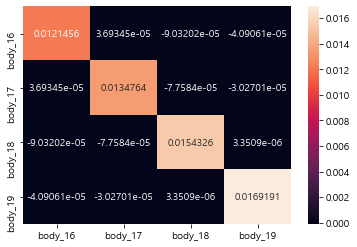

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['body_16', 'body_17', 'body_18', 'body_19']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [31]:
# body_new 17-20
body_new_17 = df1720.loc[df1720['YEAR'] == 2017, 'body_new'].dropna().reset_index(drop = True).tolist()
body_new_18 = df1720.loc[df1720['YEAR'] == 2018, 'body_new'].dropna().reset_index(drop = True).tolist()
body_new_19 = df1720.loc[df1720['YEAR'] == 2019, 'body_new'].dropna().reset_index(drop = True).tolist()
body_new_20 = df1720.loc[df1720['YEAR'] == 2020, 'body_new'].dropna().reset_index(drop = True).tolist()

print(len(body_new_17))
print(len(body_new_18))
print(len(body_new_19))
print(len(body_new_20))

# 가장 적은 body_new_20에 맞춰서 랜덤샘플링

import random

body_new_17_sample = random.choices(body_new_17, k=len(body_new_20))
body_new_18_sample = random.choices(body_new_18, k=len(body_new_20))
body_new_19_sample = random.choices(body_new_19, k=len(body_new_20))

print(len(body_new_17_sample))
print(len(body_new_18_sample))
print(len(body_new_19_sample))
print(len(body_new_20))

x = [body_new_17_sample, body_new_18_sample, body_new_19_sample, body_new_20]

In [36]:
np.cov(x)

array([[ 1.35149107e-02, -7.47366783e-05, -4.64818071e-05,
        -9.29161270e-05],
       [-7.47366783e-05,  1.59447835e-02, -5.18098685e-05,
         4.06083215e-05],
       [-4.64818071e-05, -5.18098685e-05,  1.65502911e-02,
        -8.88959982e-06],
       [-9.29161270e-05,  4.06083215e-05, -8.88959982e-06,
         1.98135504e-02]])

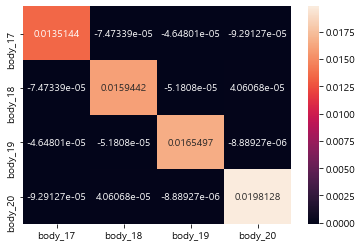

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['body_17', 'body_18', 'body_19', 'body_20']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [39]:
# depression 16-19
depression_16 = df1619.loc[df1619['YEAR'] == 2016, 'depression'].dropna().reset_index(drop = True).tolist()
depression_17 = df1619.loc[df1619['YEAR'] == 2017, 'depression'].dropna().reset_index(drop = True).tolist()
depression_18 = df1619.loc[df1619['YEAR'] == 2018, 'depression'].dropna().reset_index(drop = True).tolist()
depression_19 = df1619.loc[df1619['YEAR'] == 2019, 'depression'].dropna().reset_index(drop = True).tolist()

print(len(depression_16))
print(len(depression_17))
print(len(depression_18))
print(len(depression_19))

# 가장 적은 depression_19 맞춰서 랜덤샘플링

import random

depression_16_sample = random.choices(depression_16, k=len(depression_19))
depression_17_sample = random.choices(depression_17, k=len(depression_19))
depression_18_sample = random.choices(depression_18, k=len(depression_19))

print(len(depression_16_sample))
print(len(depression_17_sample))
print(len(depression_18_sample))
print(len(depression_19))

x = [depression_16_sample, depression_17_sample, depression_18_sample, depression_19]

34139
32573
30103
28364
28364
28364
28364
28364


In [40]:
np.cov(x)

array([[ 3.09300772e-03,  2.44279551e-05,  2.56312047e-05,
         2.23496150e-05],
       [ 2.44279551e-05,  3.47828003e-03, -1.08292461e-05,
        -1.45210346e-05],
       [ 2.56312047e-05, -1.08292461e-05,  3.09300772e-03,
        -1.29075863e-05],
       [ 2.23496150e-05, -1.45210346e-05, -1.29075863e-05,
         4.14304185e-03]])

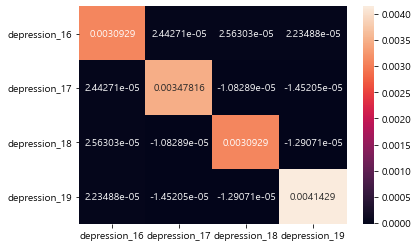

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['depression_16', 'depression_17', 'depression_18', 'depression_19']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [44]:
# depression 17-20
depression_17 = df1720.loc[df1720['YEAR'] == 2017, 'depression'].dropna().reset_index(drop = True).tolist()
depression_18 = df1720.loc[df1720['YEAR'] == 2018, 'depression'].dropna().reset_index(drop = True).tolist()
depression_19 = df1720.loc[df1720['YEAR'] == 2019, 'depression'].dropna().reset_index(drop = True).tolist()
depression_20 = df1720.loc[df1720['YEAR'] == 2020, 'depression'].dropna().reset_index(drop = True).tolist()

print(len(depression_17))
print(len(depression_18))
print(len(depression_19))
print(len(depression_20))

# 가장 적은 depression_19 에 맞춰서 랜덤샘플링

import random

depression_17_sample = random.choices(depression_17, k=len(depression_19))
depression_18_sample = random.choices(depression_18, k=len(depression_19))
depression_20_sample = random.choices(depression_20, k=len(depression_19))

print(len(depression_17_sample))
print(len(depression_18_sample))
print(len(depression_20_sample))
print(len(depression_19))

x = [depression_17_sample, depression_18_sample, depression_19, depression_20_sample]

32573
30103
28364
30183
28364
28364
28364
28364


In [45]:
np.cov(x)

array([[ 3.96819154e-03,  1.75589912e-05, -1.65745142e-05,
        -6.88263727e-06],
       [ 1.75589912e-05,  4.42267307e-03, -1.84813168e-05,
         2.75827562e-05],
       [-1.65745142e-05, -1.84813168e-05,  4.14304185e-03,
        -7.18717874e-06],
       [-6.88263727e-06,  2.75827562e-05, -7.18717874e-06,
         1.72461836e-03]])

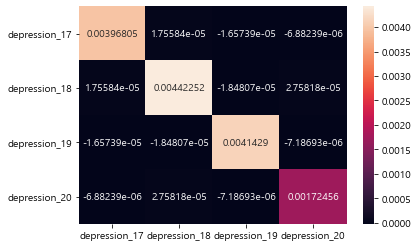

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['depression_17', 'depression_18', 'depression_19', 'depression_20']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

------------------------

#### PR_BI, M_STR 만 사용

In [53]:
# 16-19, 17-20 각각 추출 후 df 생성

df1619 = df.loc[(df['YEAR'] >= 2016) & (df['YEAR'] <= 2019)].reset_index(drop = True)
df1720 = df.loc[(df['YEAR'] >= 2017) & (df['YEAR'] <= 2020)].reset_index(drop = True)

# 필요한 열만 추출

df1619 = df1619[['YEAR', 'PR_BI', 'M_STR']]
df1720 = df1720[['YEAR', 'PR_BI', 'M_STR']]

In [54]:
df1619_mean = pd.DataFrame(df1619.groupby('YEAR').mean())
df1720_mean = pd.DataFrame(df1720.groupby('YEAR').mean())

In [55]:
df1619_mean

,PR_BI,M_STR
YEAR,,
2016,3.153019,2.766375
2017,3.164124,2.767101
2018,3.160276,2.698867
2019,3.153796,2.717380


In [56]:
df1720_mean

,PR_BI,M_STR
YEAR,,
2017,3.164124,2.767101
2018,3.160276,2.698867
2019,3.153796,2.717380
2020,3.184247,2.830021


cov matrix

In [69]:
# PR_BI 16-19
PR_BI_16 = df1619.loc[df1619['YEAR'] == 2016, 'PR_BI'].dropna().reset_index(drop = True).tolist()
PR_BI_17 = df1619.loc[df1619['YEAR'] == 2017, 'PR_BI'].dropna().reset_index(drop = True).tolist()
PR_BI_18 = df1619.loc[df1619['YEAR'] == 2018, 'PR_BI'].dropna().reset_index(drop = True).tolist()
PR_BI_19 = df1619.loc[df1619['YEAR'] == 2019, 'PR_BI'].dropna().reset_index(drop = True).tolist()

print(len(PR_BI_16))
print(len(PR_BI_17))
print(len(PR_BI_18))
print(len(PR_BI_19))

# 가장 적은 PR_BI_19 맞춰서 랜덤샘플링

import random

PR_BI_16_sample = random.choices(PR_BI_16, k=len(PR_BI_19))
PR_BI_17_sample = random.choices(PR_BI_17, k=len(PR_BI_19))
PR_BI_18_sample = random.choices(PR_BI_18, k=len(PR_BI_19))

print(len(PR_BI_16_sample))
print(len(PR_BI_17_sample))
print(len(PR_BI_18_sample))
print(len(PR_BI_19))

x = [PR_BI_16_sample, PR_BI_17_sample, PR_BI_18_sample, PR_BI_19]

65528
62276
60040
57303
57303
57303
57303
57303


In [73]:
np.set_printoptions(suppress=True)
np.cov(x)

array([[ 0.92991896,  0.00047376, -0.00295474, -0.00093627],
       [ 0.00047376,  0.93972841, -0.00134169,  0.0027709 ],
       [-0.00295474, -0.00134169,  0.94068394, -0.00478322],
       [-0.00093627,  0.0027709 , -0.00478322,  0.94687082]])

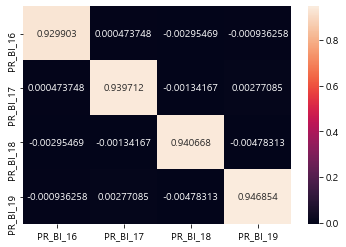

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['PR_BI_16', 'PR_BI_17', 'PR_BI_18', 'PR_BI_19']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [77]:
# M_STR 16-19
M_STR_16 = df1619.loc[df1619['YEAR'] == 2016, 'M_STR'].dropna().reset_index(drop = True).tolist()
M_STR_17 = df1619.loc[df1619['YEAR'] == 2017, 'M_STR'].dropna().reset_index(drop = True).tolist()
M_STR_18 = df1619.loc[df1619['YEAR'] == 2018, 'M_STR'].dropna().reset_index(drop = True).tolist()
M_STR_19 = df1619.loc[df1619['YEAR'] == 2019, 'M_STR'].dropna().reset_index(drop = True).tolist()

print(len(M_STR_16))
print(len(M_STR_17))
print(len(M_STR_18))
print(len(M_STR_19))

# 가장 적은 M_STR_19 맞춰서 랜덤샘플링

import random

M_STR_16_sample = random.choices(M_STR_16, k=len(M_STR_19))
M_STR_17_sample = random.choices(M_STR_17, k=len(M_STR_19))
M_STR_18_sample = random.choices(M_STR_18, k=len(M_STR_19))

print(len(M_STR_16_sample))
print(len(M_STR_17_sample))
print(len(M_STR_18_sample))
print(len(M_STR_19))

x = [M_STR_16_sample, M_STR_17_sample, M_STR_18_sample, M_STR_19]

65528
62276
60040
57303
57303
57303
57303
57303


In [78]:
np.set_printoptions(suppress=True)
np.cov(x)

array([[ 0.92192685, -0.0029068 ,  0.00067583, -0.00159346],
       [-0.0029068 ,  0.95646604,  0.00111389,  0.00292226],
       [ 0.00067583,  0.00111389,  0.94705712, -0.00452   ],
       [-0.00159346,  0.00292226, -0.00452   ,  0.9833856 ]])

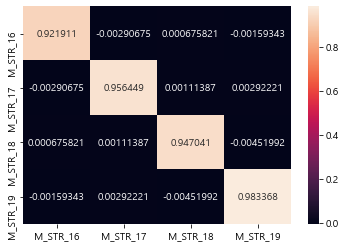

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['M_STR_16', 'M_STR_17', 'M_STR_18', 'M_STR_19']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [82]:
# PR_BI 17-20
PR_BI_17 = df1720.loc[df1720['YEAR'] == 2017, 'PR_BI'].dropna().reset_index(drop = True).tolist()
PR_BI_18 = df1720.loc[df1720['YEAR'] == 2018, 'PR_BI'].dropna().reset_index(drop = True).tolist()
PR_BI_19 = df1720.loc[df1720['YEAR'] == 2019, 'PR_BI'].dropna().reset_index(drop = True).tolist()
PR_BI_20 = df1720.loc[df1720['YEAR'] == 2020, 'PR_BI'].dropna().reset_index(drop = True).tolist()

print(len(PR_BI_17))
print(len(PR_BI_18))
print(len(PR_BI_19))
print(len(PR_BI_20))

# 가장 적은 PR_BI_20 에 맞춰서 랜덤샘플링

import random

PR_BI_17_sample = random.choices(PR_BI_17, k=len(PR_BI_20))
PR_BI_18_sample = random.choices(PR_BI_18, k=len(PR_BI_20))
PR_BI_19_sample = random.choices(PR_BI_20, k=len(PR_BI_20))

print(len(PR_BI_17_sample))
print(len(PR_BI_18_sample))
print(len(PR_BI_19_sample))
print(len(PR_BI_20))

x = [PR_BI_17_sample, PR_BI_18_sample, PR_BI_19_sample, PR_BI_20]

62276
60040
57303
54948
54948
54948
54948
54948


In [83]:
np.set_printoptions(suppress=True)
np.cov(x)

array([[ 0.94335003, -0.00620554,  0.00498644,  0.00039933],
       [-0.00620554,  0.92984723, -0.00129968,  0.00129134],
       [ 0.00498644, -0.00129968,  0.94399635,  0.00439079],
       [ 0.00039933,  0.00129134,  0.00439079,  0.94525059]])

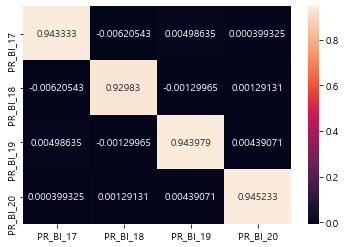

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['PR_BI_17', 'PR_BI_18', 'PR_BI_19', 'PR_BI_20']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

In [86]:
# M_STR 17-20
M_STR_17 = df1720.loc[df1720['YEAR'] == 2017, 'M_STR'].dropna().reset_index(drop = True).tolist()
M_STR_18 = df1720.loc[df1720['YEAR'] == 2018, 'M_STR'].dropna().reset_index(drop = True).tolist()
M_STR_19 = df1720.loc[df1720['YEAR'] == 2019, 'M_STR'].dropna().reset_index(drop = True).tolist()
M_STR_20 = df1720.loc[df1720['YEAR'] == 2020, 'M_STR'].dropna().reset_index(drop = True).tolist()

print(len(M_STR_17))
print(len(M_STR_18))
print(len(M_STR_19))
print(len(M_STR_20))

# 가장 적은 M_STR_20 에 맞춰서 랜덤샘플링

import random

M_STR_17_sample = random.choices(M_STR_17, k=len(M_STR_20))
M_STR_18_sample = random.choices(M_STR_18, k=len(M_STR_20))
M_STR_19_sample = random.choices(M_STR_20, k=len(M_STR_20))

print(len(M_STR_17_sample))
print(len(M_STR_18_sample))
print(len(M_STR_19_sample))
print(len(M_STR_20))

x = [M_STR_17_sample, M_STR_18_sample, M_STR_19_sample, M_STR_20]

62276
60040
57303
54948
54948
54948
54948
54948


In [87]:
np.set_printoptions(suppress=True)
np.cov(x)

array([[ 0.96166182, -0.00336115,  0.00300671,  0.00029217],
       [-0.00336115,  0.94469479, -0.0008757 , -0.00996249],
       [ 0.00300671, -0.0008757 ,  0.88747391, -0.00152256],
       [ 0.00029217, -0.00996249, -0.00152256,  0.88893656]])

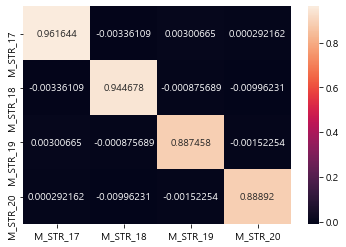

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(x, bias=True)
labs = ['M_STR_17', 'M_STR_18', 'M_STR_19', 'M_STR_20']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()